In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Battle Ship

In [2]:
class ship_spot:
    def __init__(self,board_size, name):
        self.ships = np.array([['destroyer',2],['cruiser',3 ],['submarine',3] ,['battleship',4],['carrier',5]] )
        self.board_size = int(board_size)
        self.player = str(name)
        self.board = self.arrangement()
        
    def yxo(self, i): #This method gives valid positions and orientation
        validate, val =  True, True
        while validate:
            try:
                y = int(input("{}, pick(ed) the line's   for the {} with lenght {}; line  =".format(self.player,self.ships[i,0], self.ships[i,1])))
                if y < self.board_size:
                    validate = False
            except:
                print("choose a number between 0 and {}".format(self.board_size-1))
                validate = True
        validate = True
        while validate:
            try:
                x = int(input("{}, pick(ed) the column's for the {} with lenght {}; column=".format(self.player,self.ships[i,0], self.ships[i,1])))
                if x < self.board_size:
                    validate = False
            except:
                print("choose a number between 0 and {}".format(self.board_size-1))
                validate = True
        while val:
            try:
                o = input("choose v or h refered to vertical or horizontal: ")
                if o == 'v' or o == 'h':
                    val = False
            except:
                print('You should choose between v or h')
                val = True
        return x,y,o
    
    def validation(self, i, board):
        size = self.ships[:,1]
        validate = True
        while validate:
            yxo = self.yxo(i)
            y,x = yxo[0],yxo[1]
            if yxo[2] == 'v':
                if x+int(size[i]) <= self.board_size and all(board[x:x+int(size[i]),y]==0):
                    board[x:x+int(size[i])   ,   y] = int(size[i])
                    validate = False
                else:
                    print('You overlooped the ships, try again')
                    validate = True
            if yxo[2] == 'h':
                if y+int(size[i]) <= self.board_size and all(board[x, y:y+int(size[i])]==0) :
                    board[x, y:y+int(size[i])] = int(size[i])
                    validate = False
                else:
                    print('You overlooped the ships, try again')
                    validate = True
        plt.pcolor(board ,edgecolors='k', cmap="PiYG", vmin=-5,vmax=5, linewidths=0.7)
        plt.show()
        return
    
    def arrangement(self):
        board_ship = np.zeros((self.board_size,self.board_size))
        for i in range(5):
            ship, size = self.ships[i,0],int(self.ships[i,1])
            self.validation(i,board_ship)
        return board_ship
#M = ship_spot(10, 'Filipe').board

In [ ]:
class random_ship_spot:
    
    def __init__(self,board_size, name):
        self.ships = np.array([['carrier',5],['battleship',4],['cruiser',3 ],['submarine',3] ,['destroyer',2] ] )
        self.board_size = int(board_size)
        self.player = str(name)
        self.board = self.arrangement()
        
    def yxo(self): #This method gives valid positions and orientation
        x,y,o = np.random.randint(1,self.board_size, size=3)
        return x,y,o%2
    
    def validation(self, i, board):
        size = self.ships[:,1]
        validate = True
        while validate:
            x,y,o = self.yxo()
            #print(x,y,o)
            if o == 1 and x+int(size[i]) <= self.board_size and board[x+int(size[i]),y]==0:
                if (all(board[x:x+int(size[i]),y]==0) and all(board[x:x+int(size[i]),y-1]==0) 
                    and all(board[x:x+int(size[i]),y+1]==0) and board[x-1,y] ==0 ):   
                    board[x:x+int(size[i])   ,   y] = int(size[i])
                    validate = False
                else: validate = True
            
            if o == 0  and y+int(size[i]) <= self.board_size and board[x, y+int(size[i])]==0:
                if  (all(board[x, y:y+int(size[i])]==0) and all(board[x-1, y:y+int(size[i])]==0) 
                     and all(board[x+1, y:y+int(size[i])]==0) and board[x, y-1]==0):
                    board[x, y:y+int(size[i])] = int(size[i])
                    validate = False
                else: validate = True
        return
        
    def arrangement(self):
        board_ship = np.zeros((self.board_size+2,self.board_size+2))
        for i in range(5):
            ship, size = self.ships[i,0],int(self.ships[i,1])
            self.validation(i,board_ship)
        
        board_ship=board_ship[1:self.board_size+1,1:self.board_size+1]
        #plt.pcolor(board_ship ,edgecolors='k', cmap="PiYG", vmin=-5,vmax=5, linewidths=0.7)
        #plt.show()
        return board_ship

In [3]:
class player():
    """This class gives the information about the player's board-ships and 
    the board's shot control"""
    def __init__(self, name, board_size):
        self.player = name
        self.board_size = board_size
        self.Heris_board_shotted = np.zeros((board_size,board_size))
        self.my_board = ship_spot(board_size, name).board
        
    def board_ship(self):
        return self.my_board
    
    def board_shot(self): 
        return self.Heris_board_shotted
        
    def __str__(self):
        return 'Player: {}; Size of the board: {} by {}'.format(self.player
                ,len(self.my_board),len(self.my_board))


Amary, pick(ed) the line's   for the destroyer with lenght 2; line  =0
Amary, pick(ed) the column's for the destroyer with lenght 2; column=0
choose v or h refered to vertical or horizontal: v


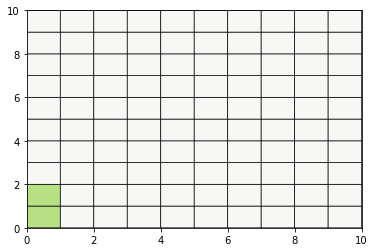

Amary, pick(ed) the line's   for the cruiser with lenght 3; line  =0
Amary, pick(ed) the column's for the cruiser with lenght 3; column=2
choose v or h refered to vertical or horizontal: v


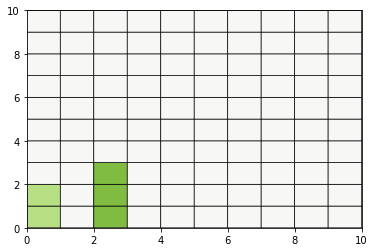

Amary, pick(ed) the line's   for the submarine with lenght 3; line  =0
Amary, pick(ed) the column's for the submarine with lenght 3; column=4
choose v or h refered to vertical or horizontal: v


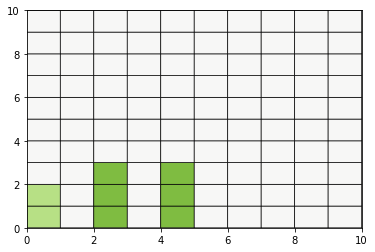

Amary, pick(ed) the line's   for the battleship with lenght 4; line  =0
Amary, pick(ed) the column's for the battleship with lenght 4; column=6
choose v or h refered to vertical or horizontal: v


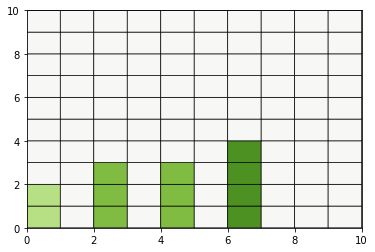

Amary, pick(ed) the line's   for the carrier with lenght 5; line  =0
Amary, pick(ed) the column's for the carrier with lenght 5; column=8
choose v or h refered to vertical or horizontal: v


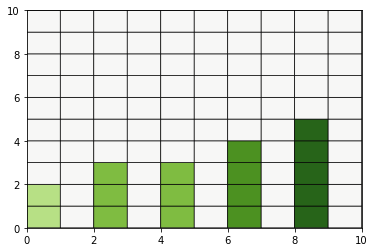

Bacuara, pick(ed) the line's   for the destroyer with lenght 2; line  =8
Bacuara, pick(ed) the column's for the destroyer with lenght 2; column=0
choose v or h refered to vertical or horizontal: v


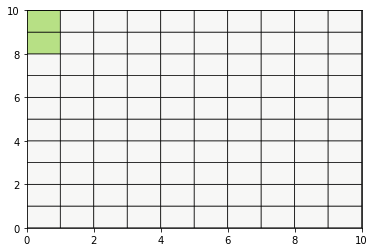

Bacuara, pick(ed) the line's   for the cruiser with lenght 3; line  =7
Bacuara, pick(ed) the column's for the cruiser with lenght 3; column=2
choose v or h refered to vertical or horizontal: v


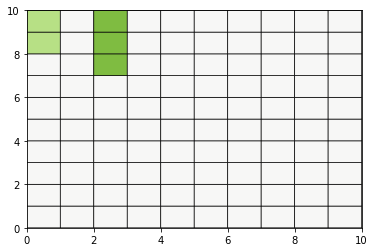

Bacuara, pick(ed) the line's   for the submarine with lenght 3; line  =7
Bacuara, pick(ed) the column's for the submarine with lenght 3; column=2
choose v or h refered to vertical or horizontal: v
You overlooped the ships, try again
Bacuara, pick(ed) the line's   for the submarine with lenght 3; line  =7
Bacuara, pick(ed) the column's for the submarine with lenght 3; column=4
choose v or h refered to vertical or horizontal: v


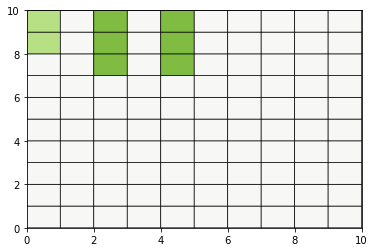

Bacuara, pick(ed) the line's   for the battleship with lenght 4; line  =6
Bacuara, pick(ed) the column's for the battleship with lenght 4; column=6
choose v or h refered to vertical or horizontal: v


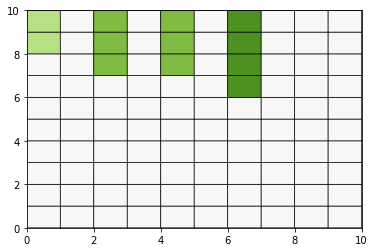

Bacuara, pick(ed) the line's   for the carrier with lenght 5; line  =5
Bacuara, pick(ed) the column's for the carrier with lenght 5; column=8
choose v or h refered to vertical or horizontal: v


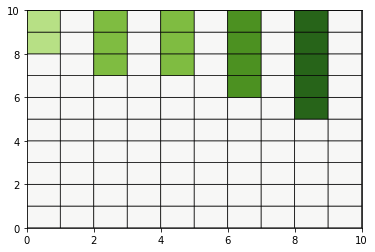

Amary, get x for to shoot: 0
Amary, get y for to shoot: 0
Round:  1 . That was close


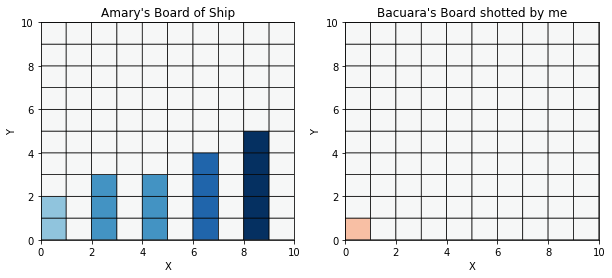

Bacuara, get x for to shoot: 
choose a number between 0 and 9
Bacuara, get x for to shoot: 0
Bacuara, get y for to shoot: 2
Round:  1 . You got one


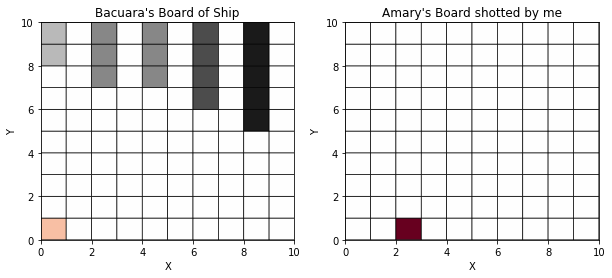

Amary, get x for to shoot: 0
Amary, get y for to shoot: 2
Round:  2 . That was close


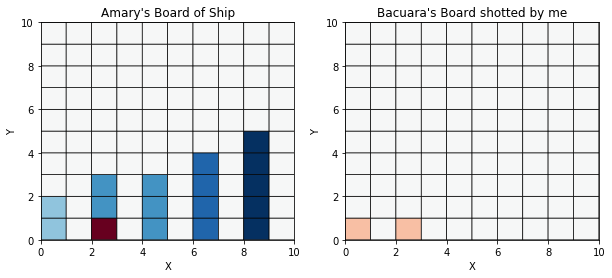

Bacuara, get x for to shoot: 0
Bacuara, get y for to shoot: 0
Round:  2 . You got one


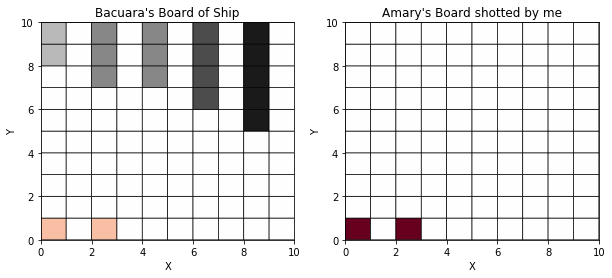

Amary, get x for to shoot: 0
Amary, get y for to shoot: 4
Round:  3 . That was close


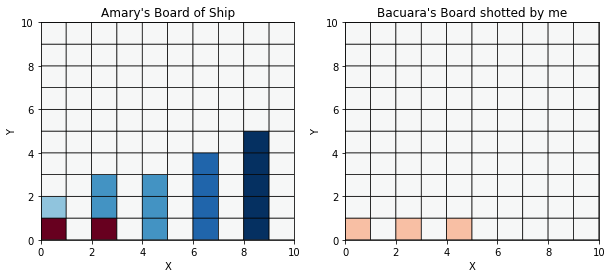

Bacuara, get x for to shoot: 0
Bacuara, get y for to shoot: 4
Round:  3 . You got one


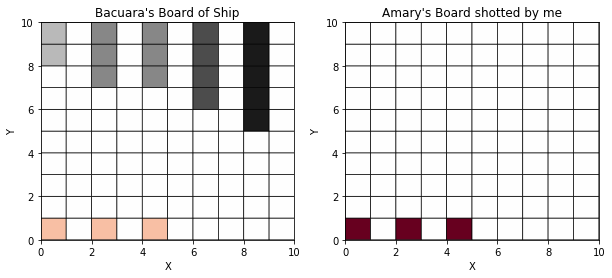

Amary, get x for to shoot: 0
Amary, get y for to shoot: 4


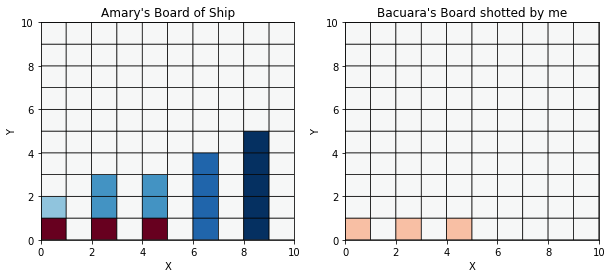

Bacuara, get x for to shoot: 0
Bacuara, get y for to shoot: 6
Round:  4 . You got one


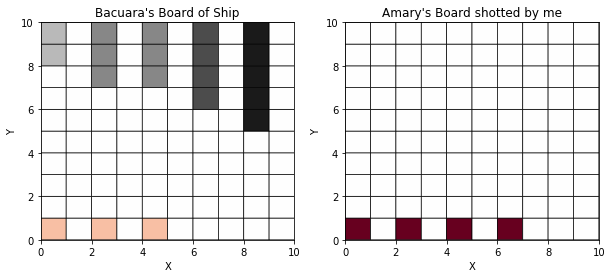

Amary, get x for to shoot: 0
Amary, get y for to shoot: 6
Round:  5 . That was close


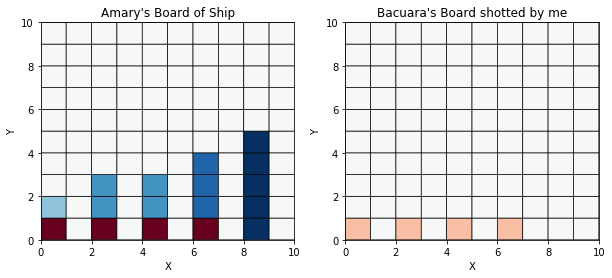

Bacuara, get x for to shoot: 0
Bacuara, get y for to shoot: 8
Round:  5 . You got one


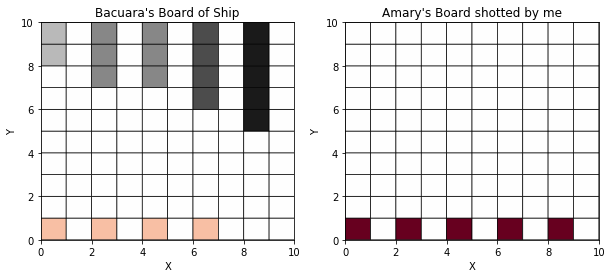

Amary, get x for to shoot: 0
Amary, get y for to shoot: 8
Round:  6 . That was close


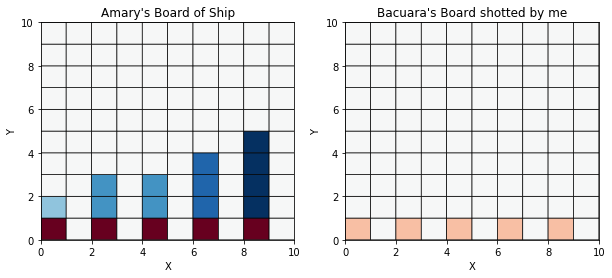

Bacuara, get x for to shoot: 2
Bacuara, get y for to shoot: 0
Round:  6 . That was close


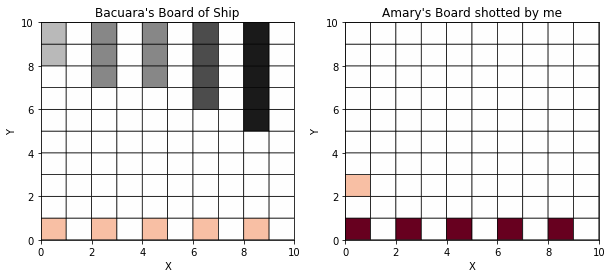

Amary, get x for to shoot: 1
Amary, get y for to shoot: 0
Round:  7 . That was close


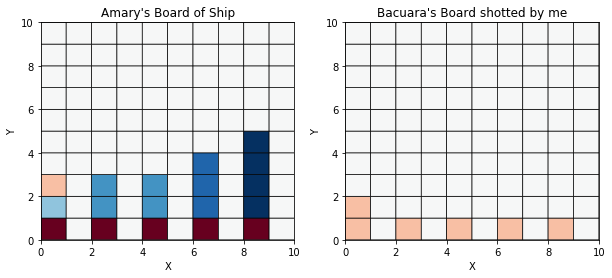

Bacuara, get x for to shoot: 1
Bacuara, get y for to shoot: 0
Round:  7 . You got one


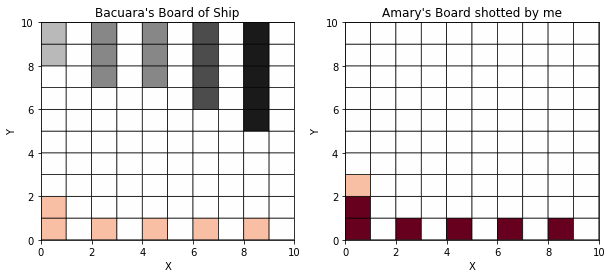

Amary, get x for to shoot: 1
Amary, get y for to shoot: 2
Round:  8 . That was close


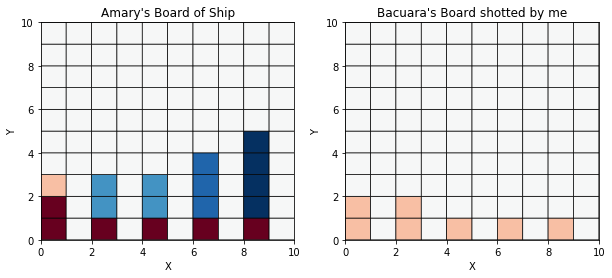

Bacuara, get x for to shoot: 1
Bacuara, get y for to shoot: 2
Round:  8 . You got one


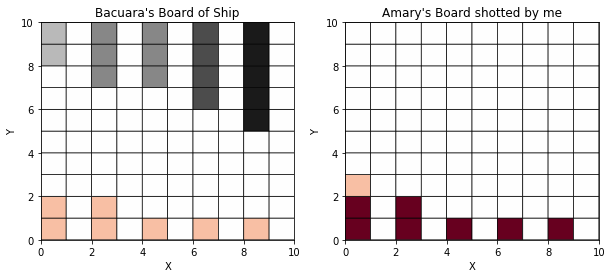

Amary, get x for to shoot: 1
Amary, get y for to shoot: 4
Round:  9 . That was close


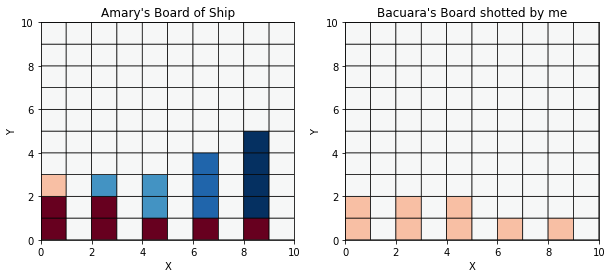

Bacuara, get x for to shoot: 
choose a number between 0 and 9
Bacuara, get x for to shoot: 4
Bacuara, get y for to shoot: 2
Round:  9 . That was close


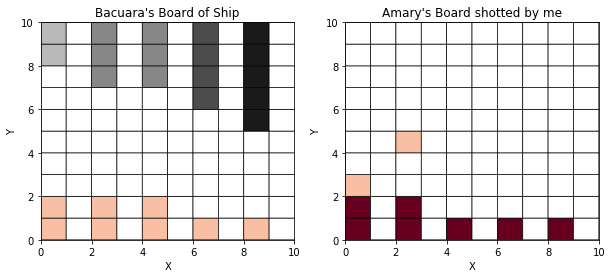

Amary, get x for to shoot: 4
Amary, get y for to shoot: 2
Round:  10 . That was close


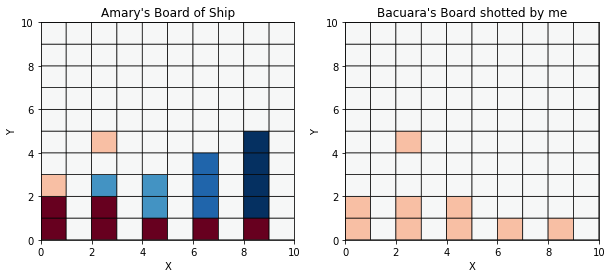

Bacuara, get x for to shoot: 
choose a number between 0 and 9
Bacuara, get x for to shoot: 2
Bacuara, get y for to shoot: 4
Round:  10 . You got one


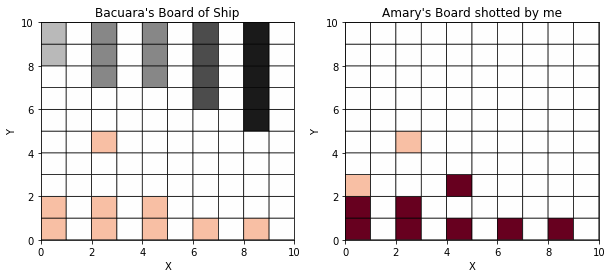

Amary, get x for to shoot: 2
Amary, get y for to shoot: 4
Round:  11 . That was close


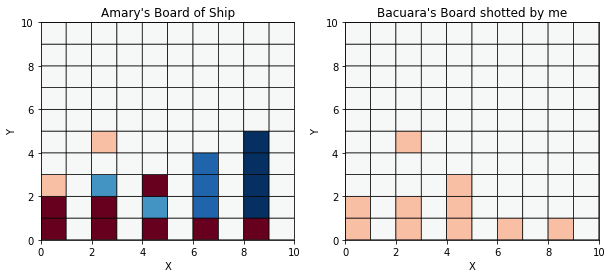

Bacuara, get x for to shoot: 1
Bacuara, get y for to shoot: 4
Round:  11 . You got one


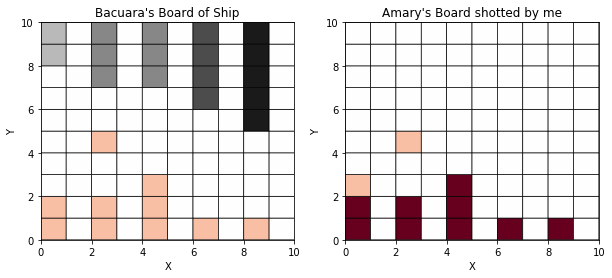

Amary, get x for to shoot: 1
Amary, get y for to shoot: 4


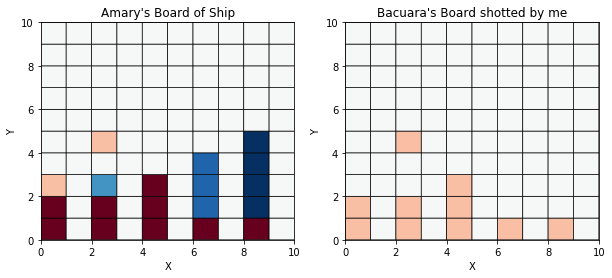

Bacuara, get x for to shoot: 1
Bacuara, get y for to shoot: 6
Round:  12 . You got one


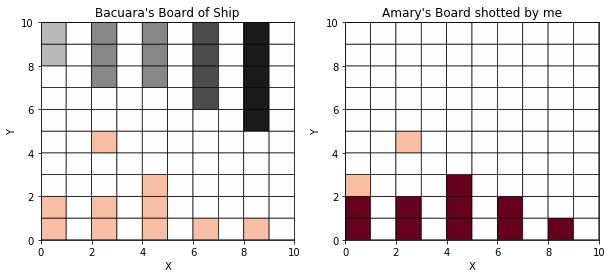

Amary, get x for to shoot: 1
Amary, get y for to shoot: 6
Round:  13 . That was close


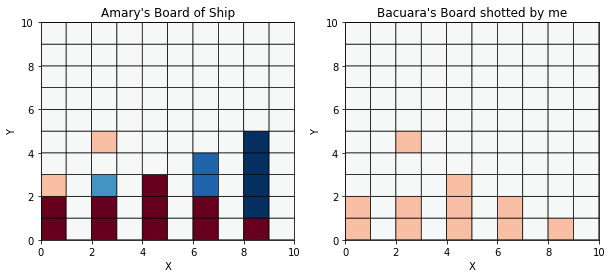

Bacuara, get x for to shoot: 2
Bacuara, get y for to shoot: 6
Round:  13 . You got one


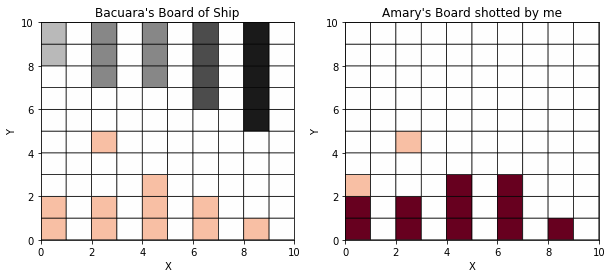

Amary, get x for to shoot: 2
Amary, get y for to shoot: 6
Round:  14 . That was close


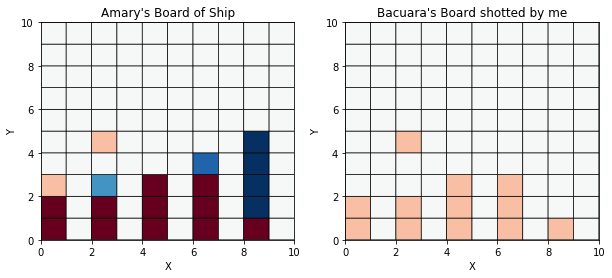

Bacuara, get x for to shoot: 3
Bacuara, get y for to shoot: 6
Round:  14 . You got one


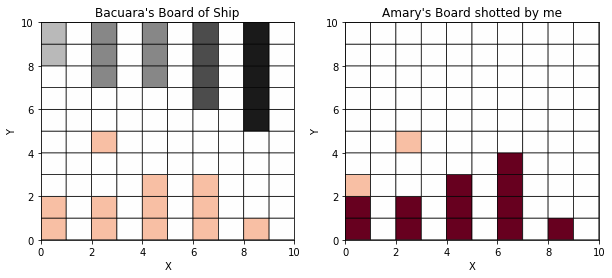

Amary, get x for to shoot: 
choose a number between 0 and 9
Amary, get x for to shoot: 6
Amary, get y for to shoot: 1
Round:  15 . That was close


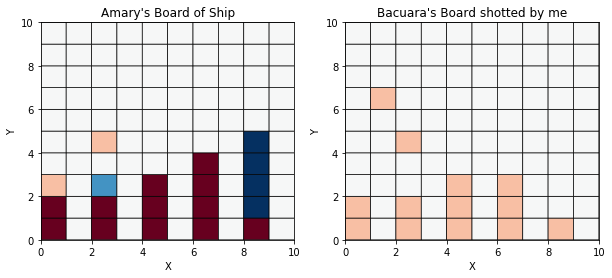

Bacuara, get x for to shoot: 
choose a number between 0 and 9
Bacuara, get x for to shoot: 1
Bacuara, get y for to shoot: 8
Round:  15 . You got one


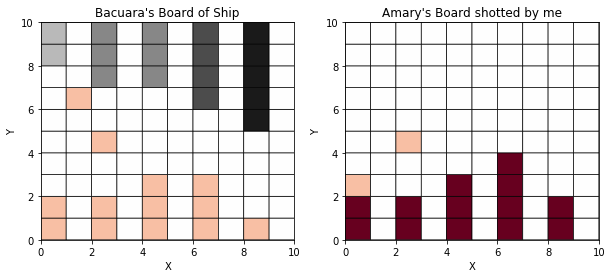

Amary, get x for to shoot: 2
Amary, get y for to shoot: 8
Round:  16 . That was close


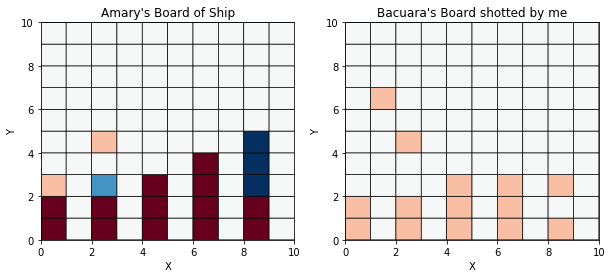

Bacuara, get x for to shoot: 2
Bacuara, get y for to shoot: 8
Round:  16 . You got one


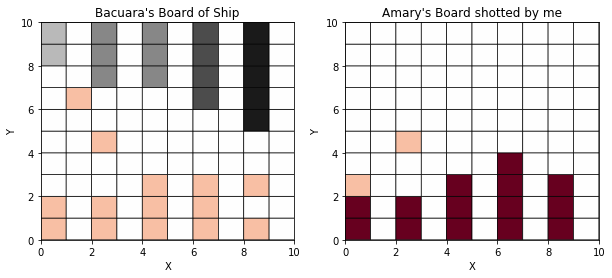

Amary, get x for to shoot: 3
Amary, get y for to shoot: 8
Round:  17 . That was close


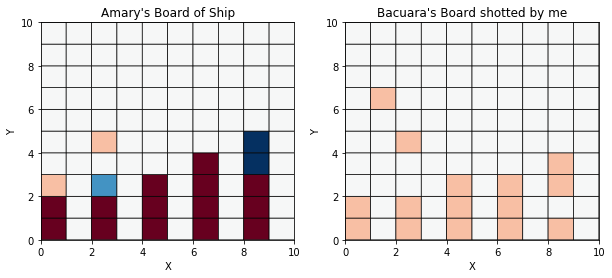

Bacuara, get x for to shoot: 3
Bacuara, get y for to shoot: 8
Round:  17 . You got one


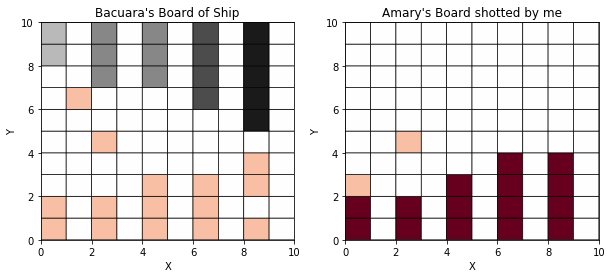

Amary, get x for to shoot: 9
Amary, get y for to shoot: 0
Round:  18 . You got one


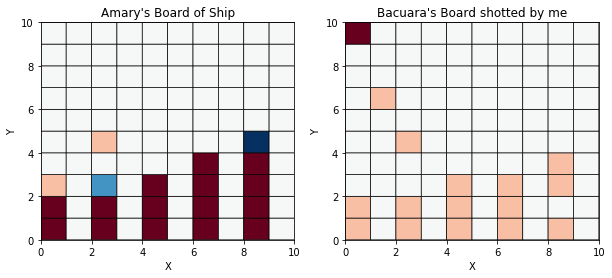

Bacuara, get x for to shoot: 9
Bacuara, get y for to shoot: 0
Round:  18 . That was close


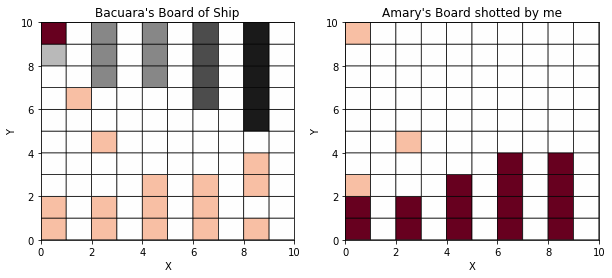

Amary, get x for to shoot: 5
Amary, get y for to shoot: 8
Round:  19 . You got one


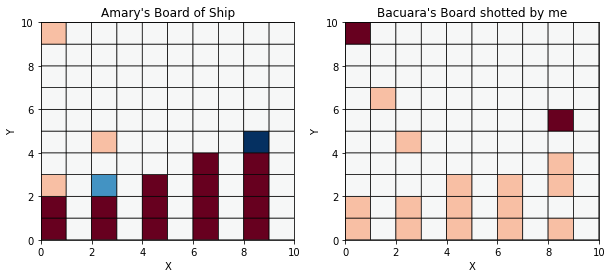

Bacuara, get x for to shoot: 5
Bacuara, get y for to shoot: 8
Round:  19 . That was close


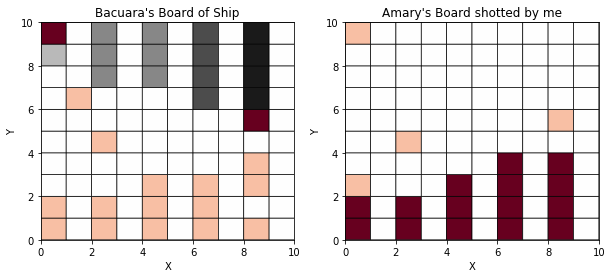

Amary, get x for to shoot: 4
Amary, get y for to shoot: 8
Round:  20 . That was close


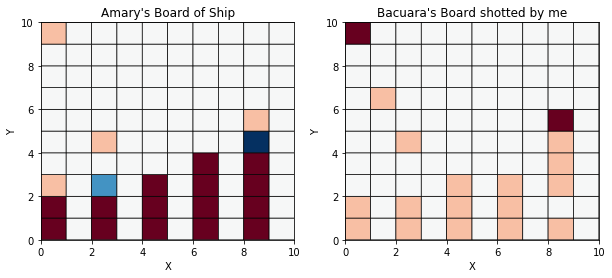

Bacuara, get x for to shoot: 4
Bacuara, get y for to shoot: 8
Round:  20 . You got one


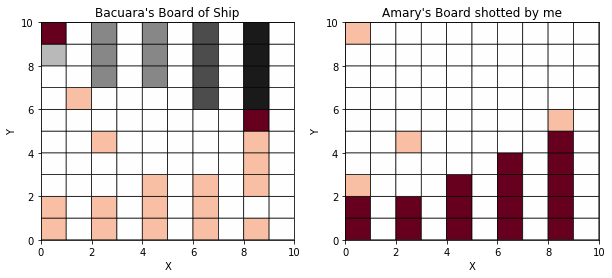

Amary, get x for to shoot: 8
Amary, get y for to shoot: 0
Round:  21 . You got one


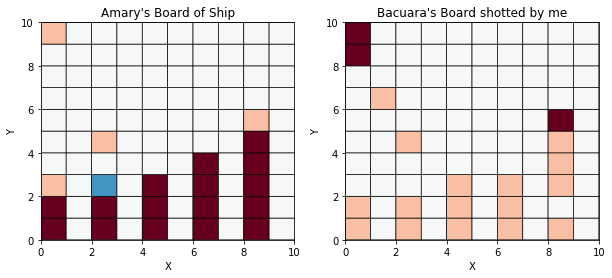

Bacuara, get x for to shoot: 2
Bacuara, get y for to shoot: 2
Round:  21 . You got one


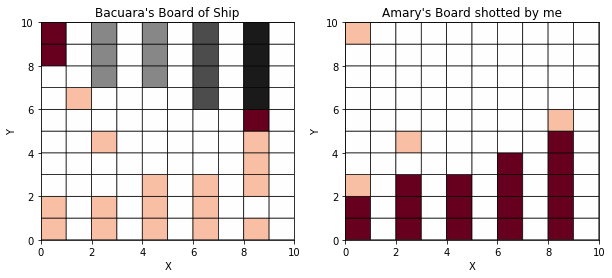

'Bacuara won the game'

In [4]:
class main:
    """The main class takecare about the view of the game, the round step and the 
    interaction between the players"""
    def __init__(self, bs):
        self.p1 = player('Amary'  ,bs)
        self.p2 = player('Bacuara',bs)
        
    def plot(self , board_ship , board_shot , player_ship , player_shot, i ):
        """Here you going to gettin with the p(n).board_ship(), p(n).board_shot(), 
        with the p(n).player and with p(m).player. Where n means the player attack and m the enemy"""
        style = ["RdBu","PRGn",'PiYG', 'BrBG', 'PuOr', 'RdGy']
        f = plt.figure(figsize=(10,4))
        ax1,ax2 = f.add_subplot(121),f.add_subplot(122)
        ax1.pcolor(board_ship ,edgecolors='k', cmap=style[i], vmin=-5,vmax=5, linewidths=0.6)
        ax2.pcolor(board_shot ,edgecolors='k', cmap=style[i], vmin=-5,vmax=5, linewidths=0.6)
        ax1.set_xlabel('X'),ax1.set_ylabel('Y')
        ax2.set_xlabel('X'),ax2.set_ylabel('Y')
        ax1.set_title(player_ship+"'s Board of Ship")
        ax2.set_title(player_shot+"'s Board shotted by me")
        plt.show()
        return
    
    def round_n(self, shooter, ships_enemy, targeted, player,n):
        """The round look at if you shotted a ship or the sea and gives 
        the belge color for wrong shot and red for the right """
        count, valid = 0, True
        
        while valid:
            try:
                x,y = int(input(player+', get x for to shoot: ')), int(input(player+', get y for to shoot: '))
                if x < self.p1.board_size and y < self.p1.board_size:
                    valid = False
            except:
                print("choose a number between 0 and {}".format(self.p1.board_size-1))
                valid = True
        if ships_enemy[x,y] == 0:
            ships_enemy[x,y] = -1.5
            targeted[x,y] = -1.5
            print('Round: ',n,'. That was close')
        elif ships_enemy[x,y] > 0 :
            ships_enemy[x,y] = -10
            targeted[x,y] = -10
            print('Round: ',n,'. You got one')
            count = 1
        return shooter,targeted, count
        
    def play(self):
        """Here we have the interaction between the 2 instance created in te __init__"""
        times = 1
        count1, count2 = 0,0
        while count1 < 17 and count2 < 17:
            A=self.round_n(self.p1.board_ship() ,self.p2.board_ship(), self.p1.board_shot(), self.p1.player,times)
            self.plot( self.p1.board_ship() , self.p1.board_shot(), self.p1.player,self.p2.player,0 )
            
            B=self.round_n(self.p2.board_ship(),self.p1.board_ship() , self.p2.board_shot(), self.p2.player,times)
            self.plot( self.p2.board_ship() , self.p2.board_shot(),self.p2.player,self.p1.player,1 )
            
            count1 += A[2]
            count2 += B[2]
            times  += 1
            
        if count1 > count2:
            win = self.p1.player+' won the game'
        else: win = self.p2.player+' won the game'
        
        return win
    
main(10).play()